In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Cargar el archivo y mostrar su contenido
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROYECTO/train.csv')
train

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo


In [3]:
# Mostrar las primeras filas
print(train.head())

       ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                       0   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET                 FAMI_EDUCACIONPADRE  \
0            Estrato 3                 Si    Técnica 

In [4]:
# Número de filas y columnas
print("Filas y columnas:", train.shape)

Filas y columnas: (692500, 17)


In [5]:
# Estadísticas descriptivas básicas
print("Estadísticas descriptivas:")
print(train.describe())

Estadísticas descriptivas:
                  ID        PERIODO
count  692500.000000  692500.000000
mean   494606.130576   20198.366679
std    285585.209455      10.535037
min         1.000000   20183.000000
25%    247324.750000   20195.000000
50%    494564.500000   20195.000000
75%    741782.500000   20203.000000
max    989286.000000   20213.000000


In [6]:
# Mostrar información básica sobre el DataFrame, como el número de filas y columnas, y los tipos de datos
print("Información del DataFrame:")
print(train.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  EST

In [7]:
# Contar los valores únicos en una columna categórica
print("Valores únicos en la columna 'ESTU_PRGM_DEPARTAMENTO':")
print(train['ESTU_PRGM_DEPARTAMENTO'].value_counts())

Valores únicos en la columna 'ESTU_PRGM_DEPARTAMENTO':
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: ESTU_PRGM_DEPARTAMENTO, dtype: int64


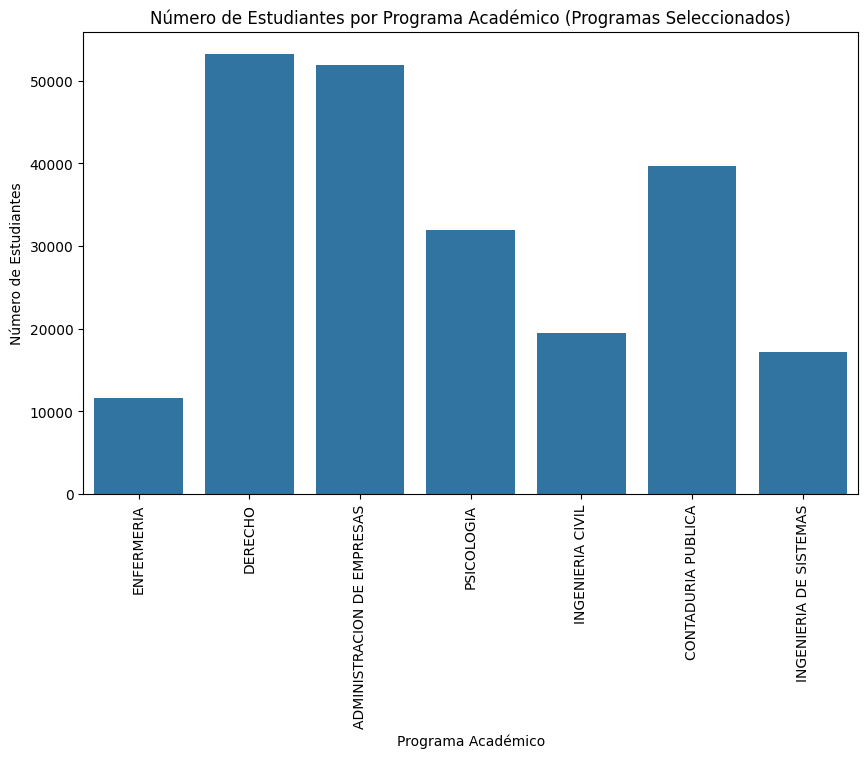

In [8]:
# Gráfica de cantidad de estudiantes en algunos programas académicos

programas_interesantes = ['INGENIERIA DE SISTEMAS', 'ADMINISTRACION DE EMPRESAS', 'PSICOLOGIA', 'DERECHO', 'ENFERMERIA', 'INGENIERIA CIVIL', 'CONTADURIA PUBLICA']

# Filtrar el DataFrame para incluir solo los programas académicos de interés
train_filtrado = train[train['ESTU_PRGM_ACADEMICO'].isin(programas_interesantes)]

# Graficar la cantidad de estudiantes por programa académico
plt.figure(figsize=(10, 6))
sns.countplot(data=train_filtrado, x='ESTU_PRGM_ACADEMICO')
plt.title('Número de Estudiantes por Programa Académico (Programas Seleccionados)')
plt.xlabel('Programa Académico')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Se sacan los números de las cadenas que se encuentran en la columna 'ESTU_VALORMATRICULAUNIVERSIDAD' y se saca el promedio, para tener un número más
# aproximado del valor de la matrícula.

# Función para sacar los números de las cadenas
def cadenas_to_numero(cadena):
    if isinstance(cadena, str):
        numeros = re.findall(r'\d+\.*\d*', cadena)
        numeros_float = [float(numero) for numero in numeros]
        if len(numeros_float) == 2:
            return sum(numeros_float) / 2
    return None

# Aplicar la función a la columna 'ESTU_VALORMATRICULAUNIVERSIDAD'
train['PROM_VALORMATRICULA'] = train['ESTU_VALORMATRICULAUNIVERSIDAD'].apply(cadenas_to_numero)

# Mostrar el DataFrame con la nueva columna
print(train[['ESTU_VALORMATRICULAUNIVERSIDAD', 'PROM_VALORMATRICULA']])

                  ESTU_VALORMATRICULAUNIVERSIDAD  PROM_VALORMATRICULA
0       Entre 5.5 millones y menos de 7 millones                 6.25
1       Entre 2.5 millones y menos de 4 millones                 3.25
2       Entre 2.5 millones y menos de 4 millones                 3.25
3       Entre 4 millones y menos de 5.5 millones                 4.75
4       Entre 2.5 millones y menos de 4 millones                 3.25
...                                          ...                  ...
692495         Entre 500 mil y menos de 1 millón               250.50
692496  Entre 2.5 millones y menos de 4 millones                 3.25
692497    Entre 1 millón y menos de 2.5 millones                 1.75
692498  Entre 2.5 millones y menos de 4 millones                 3.25
692499  Entre 5.5 millones y menos de 7 millones                 6.25

[692500 rows x 2 columns]


In [10]:
# Calcular el promedio de la columna 'ESTU_VALORMATRICULAUNIVERSIDAD', teniendo en cuenta el resultado obtenido en la columna 'PROM_VALORMATRICULA'
promedio_matricula = train['PROM_VALORMATRICULA'].mean()
print("Promedio de valor de matrícula en la universidad:", promedio_matricula)

Promedio de valor de matrícula en la universidad: 40.62127127667783
